# О проекте
<a id='target100'></a>

Тренировочный проект. Был проведён некоторый эксперимент с тестовой и контрольной группой, в ходе которого собраны данные. Требуется провести тестирование и сделать выводы.

### План:

1. [Список приоритетов](#target1) 
2. [Знакомство с результатами эксперимента](#target2) 
3. [Анализ результатов эксперимента](#target3) 
8. [Резюме](#target99)

<a id='target1'></a>
## Список приоритетов

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display
from my_module import *

In [2]:
hypothesis = pd.read_csv('datasets/hypothesis.csv', 
                          names = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], header = 0)
hypothesis['ice'] = (hypothesis.impact * hypothesis.confidence) / hypothesis.efforts
hypothesis['rice'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence) / hypothesis.efforts
hypothesis.sort_values(by = ['rice', 'ice'], ascending = False).set_index('hypothesis')

,reach,impact,confidence,efforts,ice,rice
hypothesis,,,,,,
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Из множества идей, которые могут улучшить ту или иную сторону деятельности компании, нужно сосредотачиваться на тех, которые помогут максимизировать прибыль:
- повлияв на некоторую ключевую метрику, от которой зависит прибыль (impact)
- с наибольшей гарантией результата (confidence)
- с наименьшими трудозатратами (efforts)

Отсюда - идея приоретизировать гипотезы, оценив каждую в трёх названных аспектах. Фреймворк ICE предполагает перемножение оценок impact, confidence и efforts, а во фреймворке RICE вводится ещё один аспект - это охват пользователей, которых коснётся нововведение. Предполагается, что если нововведение улучшает пользовательский опыт незначительно, зато затрагивает всех пользователей ($reach \times impact = 10 \times 1 = 10$), оно может быть настолько же выгодно для компании, как и такое нововведение, которое значительно улучшает пользовательский опыт, однако затрагивает малую часть пользователей ($reach \times impact = 1 \times 10 = 10$). В обоих случаях оценка RICE (промежуточная, т.к. ещё не посчитаны confidence и effort) равна 10.

Оценка ICE больше подходит для приоретизации гипотез, связанных с "бэкэндом", или внутренней стороной деятельности компании. А все гипотезы, представленные в таблице, так или иначе вляют на опыт взаимодействия пользователей с продуктом компании, поэтому оценку RICE стоит признать более точной. Так, по оценке ICE, максимальную выгоду компания получит от введения скидок на день рождения. Но ясно, что это нововведение позволит увеличить активность пользователей лишь раз в году, и то не всех, а лишь тех, кто в этот день вспомнит про продукт и будет в нём заинтересован. По оценке RICE эта гипотеза сместилась в списке приоритетов с первого места на самую середину. Остальные гипотезы также получили более адекватную оценку.

<a id='target2'></a> 
## Знакомство с результатами эксперимента
[// вернуться к началу](#target100) 

In [3]:
visits = pd.read_csv('datasets/visitors.csv')
orders = pd.read_csv('datasets/orders.csv', 
                     names = ['transaction_id', 'uid', 'date', 'revenue', 'group'], header = 0)

visits['date'] = pd.to_datetime(visits['date'], infer_datetime_format = True)
orders['date'] = pd.to_datetime(orders['date'], infer_datetime_format = True)

for df in [visits, orders]:
    display(df.head())
    display(df.info())
    if df.duplicated().sum() != 0:
        print('Есть дублированные записи')
    print('')

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


None

,transaction_id,uid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   uid             1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.1+ KB


None

Проверим данные на всевозможные баги - какие получится придумать.

In [4]:
print('Продолжительность наблюдений в таблице visit: ', visits.date.max() - visits.date.min())
print('Продолжительность наблюдений в таблице orders: ', orders.date.max() - orders.date.min())
print('Разница между датами начала наблюдений: ', orders.date.min() - visits.date.min())
print('Строк с дублированными transaction_id: ', orders.duplicated(subset = ['transaction_id']).sum())
print('Пользователей, записанных в обе группы: ', (orders.groupby('uid')['group'].nunique() > 1).sum())
print('Строк с нулевым revenue: ', orders[ orders.revenue == 0 ].shape[0])
print('Кол-во наблюдений для разных групп в таблице visits:')
display(visits.group.value_counts().reset_index().rename({'index': 'группа', 'group': 'наблюдений'}, 
                                                         axis = 1).set_index('группа'))
print("Характеристики столбца 'visitors':")
display(visits.visitors.describe().reset_index().rename({'index': 'параметр'}, axis = 1).set_index('параметр'))


Продолжительность наблюдений в таблице visit:  30 days 00:00:00
Продолжительность наблюдений в таблице orders:  30 days 00:00:00
Разница между датами начала наблюдений:  0 days 00:00:00
Строк с дублированными transaction_id:  0
Пользователей, записанных в обе группы:  58
Строк с нулевым revenue:  0
Кол-во наблюдений для разных групп в таблице visits:


,наблюдений
группа,
A,31
B,31


Характеристики столбца 'visitors':


,visitors
параметр,
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Всё хорошо, кроме 58 пользователей, которые по ходу проведения эксперимента меняли группу. Посмотрим на записи в таблице для случайных двух из них:

In [5]:
chameleons = orders.groupby('uid')['group'].nunique().reset_index().query('group > 1')['uid']
orders[ orders.uid.isin(chameleons.sample(2)) ].sort_values(by = ['uid', 'date'])

,transaction_id,uid,date,revenue,group
1162,1277417350,3963646447,2019-08-14,6385,A
1165,2289555915,3963646447,2019-08-14,7485,B
310,3532704780,3984495233,2019-08-03,20219,B
536,3925488023,3984495233,2019-08-04,20219,A
698,429858801,3984495233,2019-08-05,14495,A


В самом деле, 58 клиентов в разное время бывали записаны как в группу A, так и в группу B. 
- Если тестируемое изменение пользователя иногда затрагивает, а иногда нет, неизвестно, какая из версий продукта в итоге влияет на его поведение. 
- Возможно, сбой в настройках передачи данных. То есть, эксперимент проводился корректно, но некорректно записывались логи. 

Ни один вариант не оставляет возможности анализировать данные этих клиентов. Нужно иметь в виду, что удаление данных приведёт к заниженным цифрам конверсии и среднего чека (ведь покупки всё-таки имели место, просто мы не смогли их корректно учесть). Перед удалением оценим вклад этих 58 клиентов в абсолютные цифры.

In [6]:
daily = (visits.merge(orders.groupby(['date', 'group'])['uid'].nunique().reset_index(), on = ['date', 'group'])
         .rename({'uid': 'buyers'}, axis = 1))
daily_abs = (daily.groupby('date', as_index = False)[['visitors', 'buyers']].sum()
             .merge(orders.loc[ orders.uid.isin(chameleons) ].groupby('date')['uid'].nunique(), on = 'date')
             .rename({'uid': 'failed_buyers'}, axis = 1))
daily_abs['conversion'] = daily_abs.buyers / daily_abs.visitors
daily_abs['conversion_filtered'] = daily_abs.buyers.sub(daily_abs.failed_buyers) / daily_abs.visitors

print('Доля от общего revenue:', round(orders.loc[ orders.uid.isin(chameleons), 'revenue' ].sum() 
                                       / orders.revenue.sum(), 2))
print('Конверсии за день будут занижены в среднем на', round(daily_abs.conversion
                                                             .sub(daily_abs.conversion_filtered).mean(), 4))

Доля от общего revenue: 0.16
Конверсии за день будут занижены в среднем на 0.0039


Оценка конверсии пострадает на одну третью часть процента, оценка среднего чека упадёт примерно на 16%. Это весьма существенно, поэтому если окажется, что эксперимент был поставлен корректно, а ошибка возникла на этапе передачи данных, то необходимо если не провести А/B тест заново, то, по крайней мере, убедиться, что ошибочные данные собраны равномерно с пользователей из обеих групп – ведь если окажется, что мы отрезали 16% выручки и 0.39% конверсии только от одной из групп (в рамках группы это будут ~32% выручки и ~0.78% конверсии), выводы, которые мы сделаем в этом проекте, не годятся.

In [7]:
orders = orders[ orders.uid.isin(chameleons) == False ]

Изучим выбросы в разрезе групп и убедимся, что выручка не распределена нормально.

In [8]:
def two_subplots(figsize, titles):
    fig = plt.figure(figsize = figsize)
    grid = fig.add_gridspec(1, 2, wspace = 0.25)
    ax1 = fig.add_subplot(grid[0, 0]); ax2 = fig.add_subplot(grid[0, 1])
    for ax, title in zip([ax1, ax2], titles):
        ax.set_title(title, y = 1.05, fontsize = 15)
    return fig, ax1, ax2

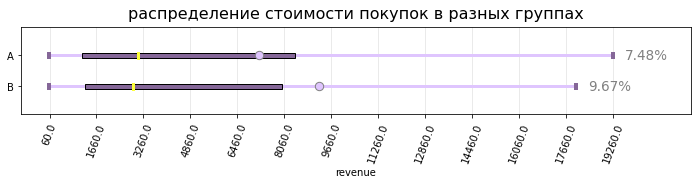

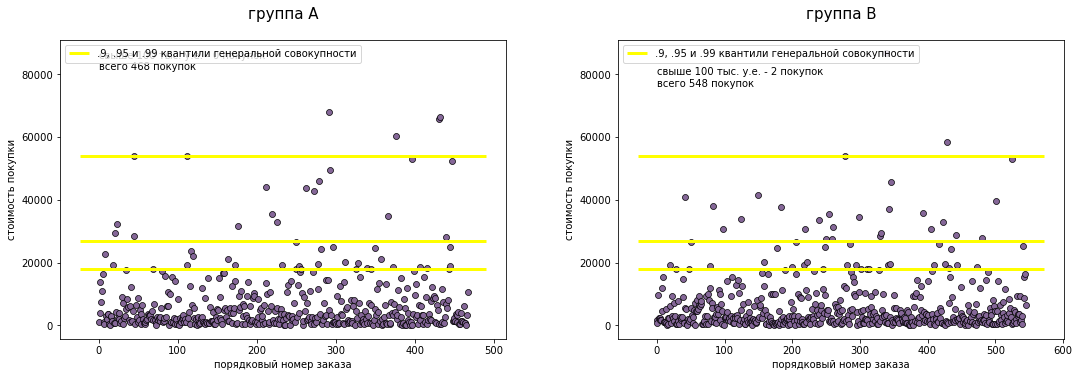

In [9]:
boxplot_sequence(orders, 'group', 'revenue', title = 'распределение стоимости покупок в разных группах')
fig, ax_a, ax_b = two_subplots((18, 5.5), ['группа А', 'группа В'])
for ax, group in zip([ax_a, ax_b], ['A', 'B']):
    ax.set(ylabel = 'стоимость покупки', xlabel = 'порядковый номер заказа')
    orders_slice = orders[ (orders.group == group) & (orders.revenue < 100000) ].reset_index(drop = True)
    outliers_cnt = orders[ (orders.group == group) & (orders.revenue > 100000) ].shape[0]
    ax.scatter(orders_slice.index, orders_slice.revenue, color = '#856798', edgecolors = 'k', linewidths = 0.7)
    ax.text(0, ax.get_ylim()[1] - ax.get_ylim()[1] * 0.163, 
            f'свыше 100 тыс. у.е. - {outliers_cnt} покупок\nвсего {orders_slice.shape[0] + outliers_cnt} покупок')
    ax.hlines(orders.revenue.quantile([.9, .95, .99]), ax.get_xlim()[0], ax.get_xlim()[1], 
              linewidth = 3, color = 'yellow', label = '.9, .95 и .99 квантили генеральной совокупности')
    ax.legend(loc = 'upper left')
ax_a.set_ylim(ax_b.get_ylim()[0], ax_b.get_ylim()[1])
    
display(fig)
plt.close(fig)

Построенные графики показывают, что группы А и В очень мало отличаются в том, что касается среднего чека: у двух выборок совпадают: первый, второй (медиана), третий квартили и ближайшие значения к 1.5 iqr. 
В группе B больше крупных заказов, превышающих .95 квантиль генеральной совокупности (это наглядно видно на scatter plot'е), но это может быть связано с тем, что в группе В в целом заказов больше, чем в группе А (548 против 468). Но кроме этого, в группе В больше значений, чем в группе А, лежит в области превышающей 1.5 iqr (9.67% против 7.48%).
Если мы откажемся от заказов на сумму, превышающую 1.5 iqr (по графикам можно заметить, что третий квартиль плюс 1.5 iqr приблизительно равен .9 квантилю, ~19000 у.е.), то нивелируем то преимущество, которое тестируемое изменение, воможно, имеет по части привлечения более дорогих заказов. В то же время, если мы не отсечём 1-5 процентов самых дорогих заказов, то в силу их малого количества и большого разброса, они непропорционально исказят средние значения выборок. 

Найдём вероятность того, что наши выборки были извлечены из генеральной совокупности, где доля выбросов в группах A и B равна (тогда различие 9.67% против 7.48% в данных выборках случайно) 

In [10]:
iqr = lambda samp: samp.quantile(.75) + (samp.quantile(.75) - samp.quantile(.25)) * 1.5
a_raw = orders.loc[ (orders.group == 'A') ]
a_outl = a_raw[ a_raw.revenue > iqr(a_raw.revenue) ]
b_raw = orders.loc[ (orders.group == 'B') ]
b_outl = b_raw[ b_raw.revenue > iqr(b_raw.revenue) ]
P = len(np.array(a_outl.index, b_outl.index)) / orders.shape[0]
P1 = a_outl.shape[0] / a_raw.shape[0]
P2 = b_outl.shape[0] / b_raw.shape[0]
z_score =  (P1 - P2) / np.sqrt(((1/a_raw.shape[0]) + (1/b_raw.shape[0])) * P * (1 - P))
p_value = (1 - st.norm(0, 1).cdf(abs(z_score))) * 2
print(f'Z-значение разницы долей: ±{round(abs(z_score), 3)}', f'p-value: {round(p_value, 3)}', sep = '\n')
if (p_value < 0.05):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными") 

Z-значение разницы долей: ±1.91
p-value: 0.056
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


P-значение очень близко к 5%-ому порогу значимости, поэтому всё-таки стоит обратить внимание на долю дорогих покупок в группе B. Но пока что у нас недостаточно оснований считать эти доли разными, можно не беспокоиться о том, что наложенная "верхняя" граница 'revenue' нивелирует преимущество одной из групп. Иначе было бы желательно выбрать такой квантиль, за которым доли превышающих значений в обеих группах приблизительно равны и не имеют статистически значимой разницы между собой.

Сравним распределения стоимости покупок в трёх случаях: после ограничения 'revenue' по .95, .96 и .98 квантилям.

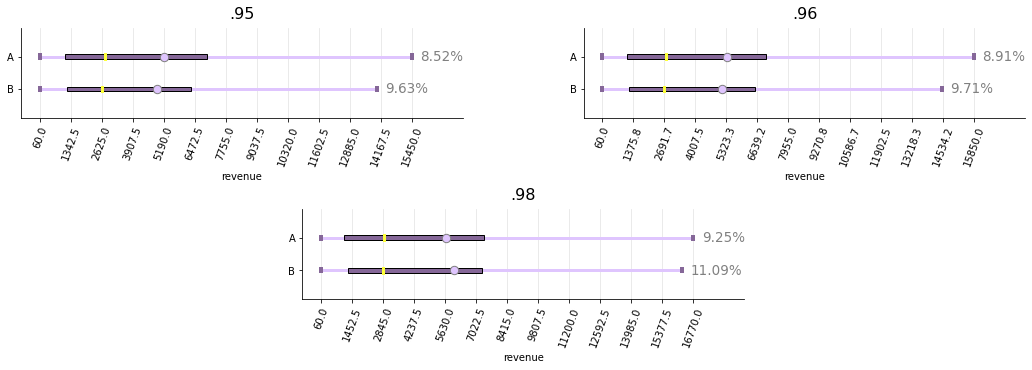

In [11]:
fig = plt.figure(figsize = (18, 5))
grid = fig.add_gridspec(2, 11, wspace = 0.4, hspace = 1)
ax1 = fig.add_subplot(grid[0, :5]); ax2 = fig.add_subplot(grid[0, 6:]); ax3 = fig.add_subplot(grid[1, 3:-3])
boxplot_sequence(orders[(orders.revenue < orders.revenue.quantile(.95))], 'group', 'revenue', title = '.95', ax = ax1)
boxplot_sequence(orders[(orders.revenue < orders.revenue.quantile(.96))], 'group', 'revenue', title = '.96', ax = ax2)
boxplot_sequence(orders[(orders.revenue < orders.revenue.quantile(.98))], 'group', 'revenue', title = '.98', ax = ax3)
for ax in fig.axes:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
display(fig)
plt.close(fig)

Рисунок во всех трёх случаях очень похожий (при этом весьма отличается от изначального рисунка распределения), поэтому предпочтительнее просто отрезать наименьший кусок из возможных - пусть это будет .96 квантиль, так как в выборку до .96 квантиля, в отличие от выборки до .98 квантиля, ещё не начали проникать те выбросы, которые в итоге значительно завышают среднее значение revenue в группе В (можно убедиться, посмотрев на изначальный рисунок распределения).

In [12]:
orders_raw = orders.copy()
orders = orders[ orders.revenue < orders.revenue.quantile(.96) ]

Наш A/B тест предполагает сравнение не только среднего чека, но и конверсий. Но клиенты, совершившие нетипично много заказов, влияют на числитель формулы конверсии так же, как слишком дорогие покупки на формулу среднего чека - в силу малого количества таких пользователей и большого разброса в числе покупок они непропорционально искажают значения конверсии в выборках. Поэтому выполним ту же последовательность действий и определимся с ограничением по максимальному числу покупок.

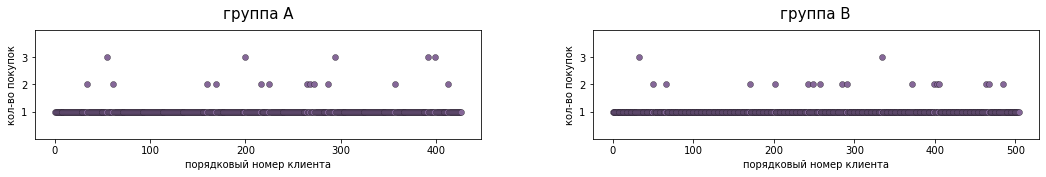

Квантиль .95 = 1
Квантиль .99 = 2


In [13]:
orders_cnt = orders.groupby('uid', as_index = False).agg({'group': 'first', 'transaction_id': 'count'})
fig, ax_a, ax_b = two_subplots((18, 2), ['группа А', 'группа В'])
for ax, group in zip([ax_a, ax_b], ['A', 'B']):
    ax.set(ylabel = 'кол-во покупок', xlabel = 'порядковый номер клиента', yticks = [1, 2, 3], ylim = (0, 4))
    orders_cnt_slice = orders_cnt[ orders_cnt.group == group ].reset_index()
    ax.scatter(orders_cnt_slice.index, orders_cnt_slice.transaction_id, color = '#856798', 
               edgecolors = 'k', linewidths = 0.3)   
display(fig)
plt.close(fig)

qls = orders_cnt.transaction_id.quantile([.95, .99])
print(f'Квантиль .95 = {int(qls.iloc[0])}', f'Квантиль .99 = {int(qls.iloc[1])}', sep = '\n')

Похоже, что после удаления ошибочных данных (а они состояли сплошь из данных об активности клиентов, совершавших не меньше двух покупок) не осталось ни одного с экстремально высоким числом покупок. Кроме того, уже на основе этого графика можно заключить, что нет нужды тратить время на тестирование улучшений в метрике APC (число покупок на клиента). Невооружённым взглядом видно, что их нет.

Убедимся, что распределение выручки далеко от нормального.

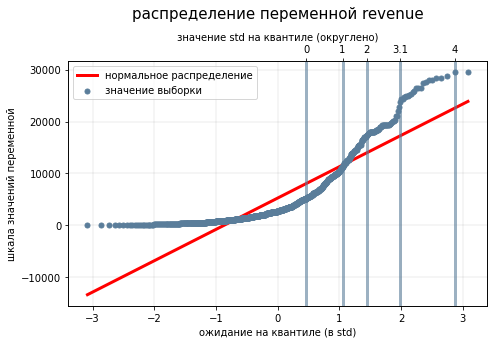

                                   pvalue
Тест Шапиро - Уилка:                8.075288031714099e-35
Тест Колмогорова - Смирнова:        3.7474950067862953e-34
	- Отвергаем нулевую гипотезу: распределение не нормально


In [14]:
qq_plot(orders.revenue, title = 'распределение переменной revenue', no_qq_table = True)

В выборке слишком много близких к нулевым значений. В нормальном распределении, во-первых, в "левой" половине гистограммы присутствовали бы отрицательные значения revenue, а во-вторых, значений в "левой" половине было бы меньше (среднее совпадало бы с медианой, а в нашей выборке среднее больше медианы). Что касается "правой" половины, то там значения растут слишком стремительно, отклонения от 0 до 2 std встречаются слишком редко, и хвост вытягивается далеко направо. Максимальное значение больше 4 std, но не превышает 5 std.

<a id='target3'></a>
## Анализ результатов эксперимента
[// вернуться к началу](#target100) 

Рассчитаем интересующие показатели, сохраним в отдельной таблице. Сделаем это два раза: для очищенных от выбросов данных и для неочищенных.

In [15]:
def calc_all(orders):
    
    # определение функций
    samples_for_mann_whitney = (lambda row: orders.loc[ (orders.date <= row['date']) & 
                                            (orders.group == row['group']), 'revenue' ].values)
    describe_until_date = (lambda row: orders[ (orders.date <= row['date']) & (orders.group == row['group']) ]
                                       .agg({'date': 'max', 'group': 'max', 'revenue': 'sum', 
                                             'transaction_id': 'count', 'uid': 'nunique'}))
    calc_conversion = (lambda row: orders.loc[ (orders.date == row['date']) & (orders.group == row['group']), 
                                   'uid' ].nunique() / row['dau'])
    mean_conversion_until_date = (lambda row: daily.loc[ (daily.date <= row['date']) 
                                              & (daily.group == row['group']), 'conversion' ].mean())

    # запись результатов функций в общую таблицу
    daily = visits.merge(visits.apply(describe_until_date, axis = 1), on = ['date', 
                         'group']).rename({'uid': 'unique_buyers_cum_cnt', 'revenue': 'revenue_cum', 
                                           'transaction_id': 'transactions_cum_cnt', 'visitors': 'dau'}, axis = 1)
    daily['conversion'] = daily.apply(calc_conversion, axis = 1)
    daily['conversion_cum'] = daily.apply(mean_conversion_until_date, axis = 1)
    daily['sample_revenue_cum'] = daily.apply(samples_for_mann_whitney, axis = 1)
    daily['avp_cum'] = daily.sample_revenue_cum.apply(lambda x: x.mean())
    daily['estimated_mau_cum'] = (daily.unique_buyers_cum_cnt / daily.conversion_cum).astype('int')

    return daily

In [16]:
daily = calc_all(orders)
daily_raw = calc_all(orders_raw)
daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   62 non-null     datetime64[ns]
 1   group                  62 non-null     object        
 2   dau                    62 non-null     int64         
 3   revenue_cum            62 non-null     int64         
 4   transactions_cum_cnt   62 non-null     int64         
 5   unique_buyers_cum_cnt  62 non-null     int64         
 6   conversion             62 non-null     float64       
 7   conversion_cum         62 non-null     float64       
 8   sample_revenue_cum     62 non-null     object        
 9   avp_cum                62 non-null     float64       
 10  estimated_mau_cum      62 non-null     int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(4), object(2)
memory usage: 5.1+ KB


Одно замечание - неидеально, когда метрику за весь период находят, усредняя множество значений метрики за период. Но в данном случае нам пришлось находить накопительную конверсию, усредняя показатели конверсии за каждый день. Так происходит из-за того, что нам неизвестно накопительное значение уникальных пользователей, а лишь ежедневное (DAU). Пусть в первый день пришло 600 уникальных пользователей, а во второй день - 500. Это не значит, что за два дня было привлечено 1100 уникальных пользователей: неизвестно, сколько из них заходили на сайт как в первый, так и во второй день. Следовательно, нельзя делить 1100 на число уникальных покупателей за два дня, так как получим ничего не означащее число вместо конверсии. Поэтому мы считаем конверсию за первый и за второй дни отдельно, потом находим среднее и предъявляем его как накопительную конверсию за два дня. При таком способе подсчёте чем больше колебания конверсии в дни пиковой активности, тем больше погрешность: конверсия за такой день рассчитывается из большего числа пользователей и клиентов, чем за другой день, поэтому должна иметь больший "вес", иначе говоря, "притягивать" накопительную конверсию ближе к себе. Но когда мы усредняем две конверсии за два дня, мы с двумя значениями всегда обращаемся так, будто они имеют равный "вес", и находим значение, "равноудалённое" от обоих. Аналогичная проблема с днями спада активности. Поэтому перед тем, как интерпретировать результаты теста, проверим, не было ли пиков и спадов активности за время эксперимента.

In [17]:
def customize_ax(ax, ylabel, grid = True, legend = True, loc = False):
    ax.set(xlim = (0, 32), xticks = xticks, ylabel = ylabel, 
           xlabel = 'день эксперимента', ylim = ax.get_ylim())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if legend:
        if loc:
            ax.legend(fontsize = 'large', loc = loc)
        else:
            ax.legend(fontsize = 'large')
    if grid:
        ax.grid(b = True, axis = 'y')

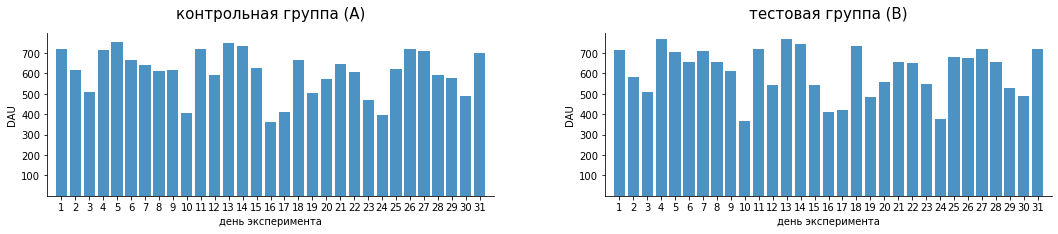

In [18]:
xticks = np.arange(1, 32)
fig, ax1, ax2 = two_subplots((18, 3), ['контрольная группа (А)', 'тестовая группа (В)'])

for ax, group in zip([ax1, ax2], ['A', 'B']):
    daily_sliced = daily[ daily.group == group ]
    ax.bar(daily_sliced.date.dt.day, daily_sliced.dau.values, alpha = 0.8)
    customize_ax(ax, 'DAU', grid = False, legend = False)
    ax.set(ylim = (0, 800), yticks = np.arange(100, 800, 100))
    
display(fig)
plt.close(fig)

Пиков не было, но были спады - 10, 16, 17 и 24 числа. Вес конверсий за эти дни должен быть ниже, чем за остальные, но насколько - сказать трудно. 

Рассчитаем приблизительное число уникальных посетителей за месяц эксперимента (MAU). Мы можем сложить число уникальных посетителей за каждый день в каждой группе (оно нам дано в агрегированной таблице), но получившаяся сумма не будет равна размерам групп (она вообще не будет иметь никакого эмпирического смысла). Поэтому чтобы оценить истинные размеры групп хотя бы приблизительно, поделим количество уникальных покупателей на среднюю конверсию за тридцать дней наблюдения. Интересуют именно уникальные посетители и уникальные клиенты (а не сессии и транзакции), так как метрика, изменения в которой нас интересуют (то есть, конверсия) считается из уникальных uid'ов.

In [19]:
b_total = daily[ daily.group == 'B' ].estimated_mau_cum.max()
a_total = daily[ daily.group == 'A' ].estimated_mau_cum.max()
print(f'В эксперименте поучаствовали приблизительно {b_total + a_total} уникальных')
print(f'пользователей, в группе А - {a_total}, а группе В - {b_total}')

В эксперименте поучаствовали приблизительно 35080 уникальных
пользователей, в группе А - 17633, а группе В - 17447


Эксперимент уже окончен. Поздно задумываться о размерах выборок. Однако, если мы фиксируем различия, то должны сообщить заказчику, с какой значимостью мы это делаем, а если не находим оснований для различий, то с какой мощностью. Поэтому нужно разобраться, что вообще можно утверждать, имея выборки такого размера.

Чем больше размеры выборок, тем сильнее у распределения выборочных средних уменьшается дисперсия выборочных средних вокруг истинного среднего. Поэтому, наращивая размеры выборки A и выборки B, мы утверждаем, что их средние становятся всё ближе к истинным средним - ведь размах того распределения, которому они принадлежат, всё более концентрируется вокруг истинных средних. Соответственно, растёт наша уверенность в оценке совпадения или разности выборочных средних: пусть истинные средние A и B не равны, тогда по мере увеличения размеров выборок будет уменьшаться "область пересечения" распределений выборочных средних группы A и группы B - всё большее количество выборочных средних будут однозначно принадлежать либо полигону выборочных средних B, либо полигону выборочных средних A (то есть значимо отличаться от любого значения другой группы). 

Поставив перед собой задачу найти минимальные размеры выборок, мы отталкиваемся от значимости (обозначим как $\alpha$) и мощности (обозначим как $\beta$), которые нам нужны, а также от двух значений - среднего из A и минимального отличия от A (обозначим как __dif__), которое хотим зафиксировать. Тогда задача сводится к следующей: при каких размерах выборка из группы А будет описываться таким распределением, в котором вероятность значения, превышающего __dif__ равна $\alpha$, и одновременно с этим, при каких размерах выборки из B вероятность значения, меньшего чем __dif__ равна $\beta$ (если же мы хотим зафиксировать не рост в B относительно A, а падение, то наоборот).

Кажется, что в бизнесе цена ошибки первого рода выше цены ошибки второго рода. Если тест находит значимые различия между выборками, которые в генеральной совокупности равны (ошибка первого рода), то по результатам этого теста могут быть понапрасну потрачены большие ресурсы (на внедрение нововведения) и взята некоторая доля риска (ведь изменения в том, что уже работает всегда связаны с риском потерь). Когда же тест не находит реально существующие различия - это значит, во-первых, что различие не так уж велико, а во-вторых, что в бизнесе всё останется по-прежнему, без трат и риска. Поэтому если стоит выбор между значимостью и мощностью, лучше предпочесть значимость.

- возьмём по умолчанию $\alpha$ и $\beta$ равные 0.05
- в качестве __dif__ (минимального отличия от A, которое мы хотим зафиксировать с заданными уровнями значимости и мощности) возьмём конверсию в группе B на последний день эксперимента

In [20]:
base_conversion = daily.loc[ daily['group'] == 'A', 'conversion' ].mean()
new_conversion = daily.loc[ daily['group'] == 'B', 'conversion' ].mean()

Воспользуемся формулой для расчёта требуемого размера выборок.

In [21]:
def get_size(theta_c, theta_t, alpha, beta):
    t_alpha = st.norm.ppf(1 - alpha, loc = 0, scale = 1)
    t_beta = st.norm.ppf(beta, loc = 0, scale = 1)
    n = t_alpha * np.sqrt(theta_t * (1 - theta_t))
    n -= t_beta * np.sqrt(theta_c * (1 - theta_c))
    n /= theta_c - theta_t
    return int(np.ceil(n ** 2))

n_max = get_size(base_conversion, new_conversion, 0.05, 0.05)
print('Минимальный размер выборок:', n_max, 'на группу')
print('Выборки достигают этих размеров на', daily.loc[ daily.estimated_mau_cum >= n_max, 'date'].min().day, 'день')

Минимальный размер выборок: 12489 на группу
Выборки достигают этих размеров на 22 день


К 22 дню собрано достаточно наблюдений, чтобы утверждать о наличии разницы в 0.0047 процентных пункта со значимостью 0.05. Иначе говоря, если мы хотим зафиксировать +0.0047 прирост конверсии (это прирост конверсии в группе B относительно группы А), нужно дождаться 22го дня и зафиксировать статистическую значимость p-value < 0.05 различий именно на этот день, но не раньше. Мы посмотрим на график накопительной кривой и убедимся, что к двадцать второму дню кривая различий между группами подходит плавно и постепенно. Если мы увидим, что на двадцатый день происходит нечто из ряда вон, что из состояния, в котором различий не было, резко уводит кривую вверх, а на двадцать второй день, не успев "стабилизироваться", кривая остаётся за пределами границ неразличимости, то будем утверждать, что столкнулись с проблемой подсматривания тогда, когда уже не должны были. Такое тоже может быть. Кроме того, от 22го до 30го дня ещё семь дней, в течение которых оценка различий (если различия будут найдены) будет корректироваться.

Изучим, как за время эксперимента в контрольной и тестовой группах менялись: 
1. Накопительная выручка
2. Накопительный средний чек
3. Накопительная конверсия

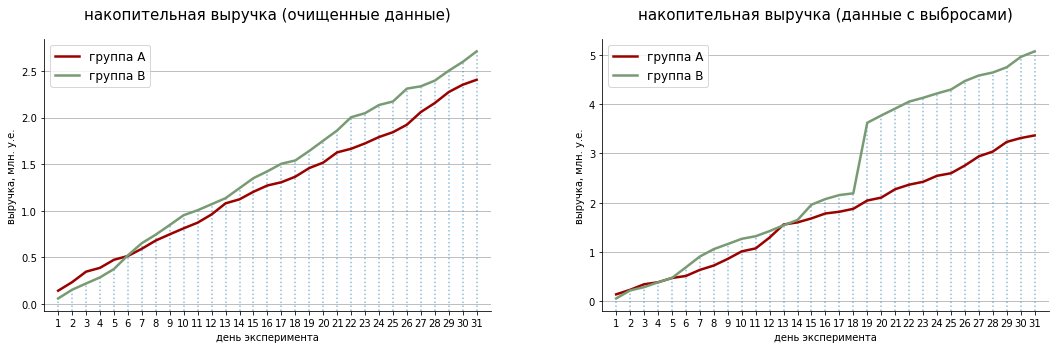

In [22]:
fig, ax1, ax2 = two_subplots((18, 5), ['накопительная выручка (очищенные данные)', 
                                       'накопительная выручка (данные с выбросами)'])

for ax, data in zip([ax1, ax2], [daily, daily_raw]): 
    for group, color in zip(['A', 'B'], ['#9a0200', '#789b73']):
        data_sliced = data[ data.group == group ]
        ax.plot(xticks, data_sliced.revenue_cum.div(1000000), label = f'группа {group}', 
                color = color, linewidth = 2.5)
    customize_ax(ax, 'выручка, млн. у.е.')
    ax.vlines(xticks, ax.get_ylim()[0], data_sliced.revenue_cum.div(1000000), alpha = 0.5, linestyle = 'dotted')
    
display(fig)
plt.close(fig)

От выбросов зависит большая часть выручки компании. Обрезав данные по 96 квантилю переменной revenue, мы уменьшили суммарную выручку с групп почти в два раза. Но в рамках A/B теста это не страшно. Кроме того, стало заметно незначительное, но постоянное преимущество группы B в выручке - это значит, что в какой-то из метрик мы вполне можем найти значимое отличие.

Протестируем равенство среднего чека. Так как разница между средними распределена нормально, а дисперсия в значениях выручки не искажена выбросами, можно воспользоваться параметрическим тестом на равенство выборочных средних. Мы сделаем два теста, параметрический и непараметрический, и сравним их результаты.

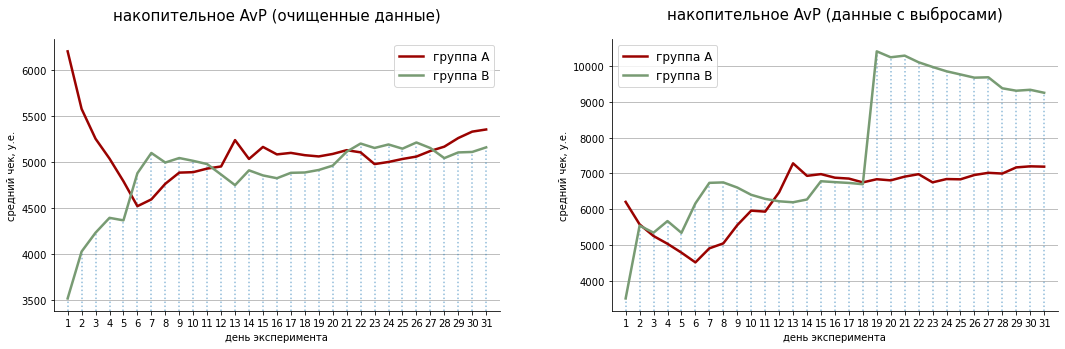

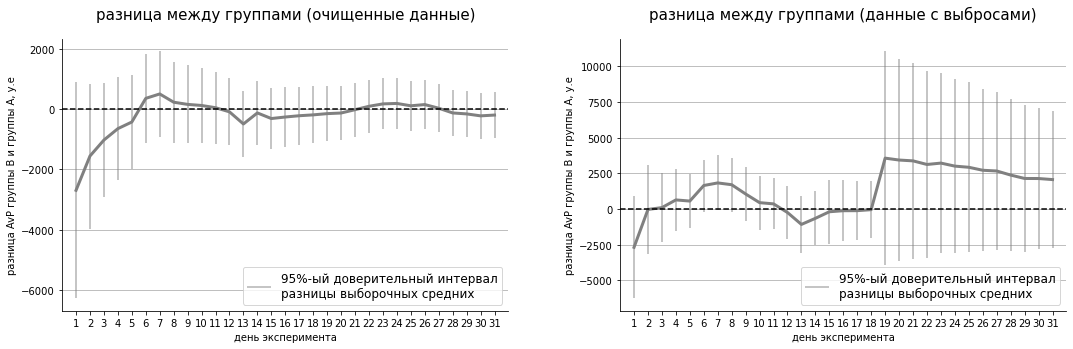

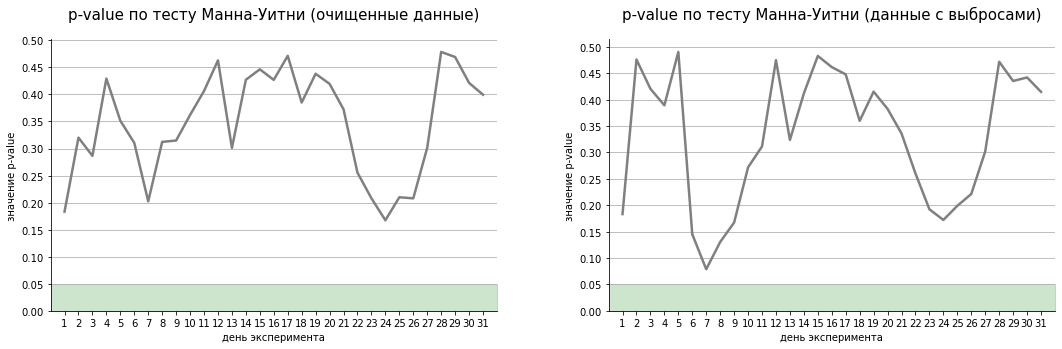

In [23]:
fig1, ax1, ax2 = two_subplots((18, 5), ['накопительное AvP (очищенные данные)', 
                                       'накопительное AvP (данные с выбросами)'])

for ax, data in zip([ax1, ax2], [daily, daily_raw]): 
    for group, color in zip(['A', 'B'], ['#9a0200', '#789b73']):
        data_sliced = data[ data.group == group ]
        ax.plot(xticks, data_sliced.avp_cum, label = f'группа {group}', 
                color = color, linewidth = 2.5)
    customize_ax(ax, 'средний чек, у.е.')
    ax.vlines(xticks, ax.get_ylim()[0], data_sliced.avp_cum, alpha = 0.5, linestyle = 'dotted')

fig2, ax1, ax2 = two_subplots((18, 5), ['разница между группами (очищенные данные)', 
                                        'разница между группами (данные с выбросами)'])

fig3, ax3, ax4 = two_subplots((18, 5), ['p-value по тесту Манна-Уитни (очищенные данные)', 
                                        'p-value по тесту Манна-Уитни (данные с выбросами)'])

for ax, ax_x, data in zip([ax1, ax2], [ax3, ax4], [daily, daily_raw]): 
    difference = (data.loc[ data.group == 'B', 'sample_revenue_cum' ].apply(np.mean).values 
                  - data.loc[ data.group == 'A', 'sample_revenue_cum' ].apply(np.mean).values)
    ax.plot(xticks, difference, linewidth = 3, color = 'grey')
    ax.axhline(y = 0, color = 'black', linestyle = '--')
    ax_x.fill_between(np.arange(0, 33), [0.0 for x in np.arange(0, 33)], 
                      [0.05 for x in np.arange(0, 33)], color = 'green', alpha = 0.2)
    mw_pvalues = []
    
    # рассчёт доверительных интервалов на основе t-значения
    for xtick, date in enumerate(daily.date.drop_duplicates(), 1):
        samp_date = data[ (data.date == date) ]
        samp_a = samp_date[ (samp_date.group == 'A') ]['sample_revenue_cum'].iloc[0]
        samp_b = samp_date[ (samp_date.group == 'B') ]['sample_revenue_cum'].iloc[0]
        len_a = len(samp_a) 
        len_b = len(samp_b)
        if st.levene(samp_a, samp_b).pvalue < 0.05:
            results = st.ttest_ind(samp_a, samp_b, equal_var = False)
        else:
            results = st.ttest_ind(samp_a, samp_b, equal_var = True)
        if results.pvalue < 0.05:
            style = {'color': 'green', 'alpha': 0.8, 'linewidth': 2}
        else:
            style = {'color': 'grey', 'alpha': 0.6}
        scale = np.sqrt((np.std(samp_a)**2 / len_a) 
                      + (np.std(samp_b)**2 / len_b))
        conf = st.norm.interval(0.95, loc = samp_b.mean() - samp_a.mean(), scale = scale)
        ax.vlines(xtick, conf[0], conf[1], **style)
        mw_pvalues.append(st.mannwhitneyu(samp_a, samp_b)[1])
        
    ax.vlines([], [], [], color = 'grey', alpha = 0.6, 
              label = '95%-ый доверительный интервал\nразницы выборочных средних')
    customize_ax(ax, 'разница AvP группы B и группы A, у.е', loc = 'lower right')
    
    ax_x.plot(xticks, mw_pvalues, linewidth = 2.5, color = 'grey')
    ax_x.set_ylim(0, ax_x.get_ylim()[1])
    ax_x.set_yticks(np.arange(0, ax_x.get_ylim()[1], 0.05))
    customize_ax(ax_x, 'значение p-value', legend = False)
    
for fig in [fig1, fig2, fig3]:
    display(fig)
    plt.close(fig)
    print()

Нет статистически значимого различия по среднему чеку между группами, независимо от того, очищены ли данные от выбросов и какой критерий мы используем для проверки гипотезы, T-критерий Стьюдента или U-критерий Манна-Уитни.

Перейдём к конверсии. Мы не обнаружили выбросов в частотности покупок, поэтому график по сырым данным будет таким же, как и по обработанным - строить его отдельно не обязательно.

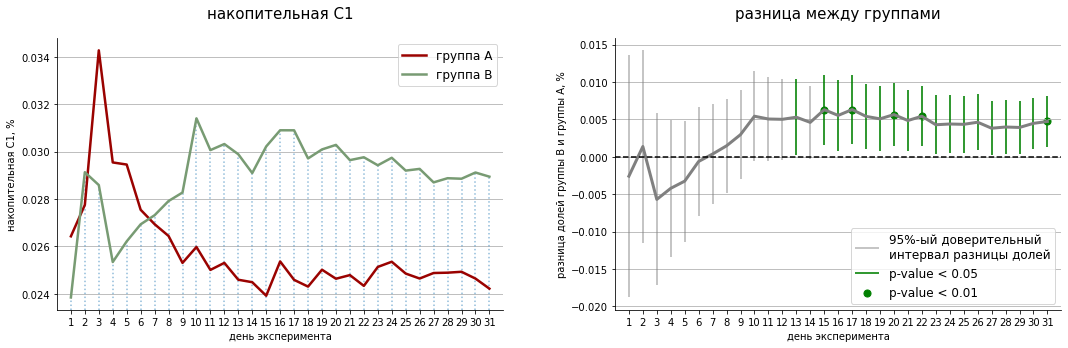

In [24]:
fig, ax1, ax2 = two_subplots((18, 5), ['накопительная C1', 'разница между группами'])

for group, color in zip(['A', 'B'], ['#9a0200', '#789b73']):
    data_sliced = daily[ daily.group == group ]
    ax1.plot(xticks, data_sliced.conversion_cum, label = f'группа {group}', 
            color = color, linewidth = 2.5)
customize_ax(ax1, 'накопительная C1, %')
ax1.vlines(xticks, ax1.get_ylim()[0], data_sliced.conversion_cum, alpha = 0.5, linestyle = 'dotted')

difference_overall = (daily.loc[ daily.group == 'B', 'conversion_cum' ].values 
                      - daily.loc[ daily.group == 'A', 'conversion_cum' ].values)
ax2.plot(xticks, difference_overall, linewidth = 3, color = 'grey')
ax2.axhline(y = 0, color = 'k', linestyle = '--')

# рассчёт доверительных интервалов на основе z-значения
for xtick, date in enumerate(daily.date.drop_duplicates(), 1):
    samp_date = daily[ (daily.date == date) ]
    a_buy = samp_date.loc[ (samp_date.group == 'A') ]['unique_buyers_cum_cnt'].values[0]
    b_buy = samp_date.loc[ (samp_date.group == 'B') ]['unique_buyers_cum_cnt'].values[0]
    a_vis = a_buy / (samp_date.loc[ (samp_date.group == 'A') ]['conversion_cum'].values[0])
    b_vis = b_buy / (samp_date.loc[ (samp_date.group == 'B') ]['conversion_cum'].values[0])
    P = (a_buy + b_buy) / (a_vis + b_vis)
    P1 = a_buy / a_vis
    P2 = b_buy / b_vis
    difference = P2 - P1
    scale = np.sqrt(((1/a_vis) + (1/b_vis)) * P * (1 - P))
    conf = st.norm.interval(0.95, loc = difference, scale = scale)
    z_score =  difference / scale
    p_value = (1 - st.norm(0, 1).cdf(abs(z_score))) * 2
    
    dot = False
    if p_value < 0.05:
        style = {'color': 'green', 'alpha': 0.8, 'linewidth': 2}
        if p_value < 0.01:
            dot = True
    else:
        style = {'color': 'grey', 'alpha': 0.6}
    ax2.vlines(xtick, conf[0], conf[1], **style)
    if dot:
        ax2.scatter(xtick, difference, color = 'green', s = 50)

ax2.vlines([], [], [], color = 'grey', alpha = 0.6, label = '95%-ый доверительный\nинтервал разницы долей')
ax2.vlines([], [], [], color = 'green', alpha = 0.8, linewidth = 2, label = 'p-value < 0.05')
ax2.scatter([], [], color = 'green', s = 50, label = 'p-value < 0.01')
customize_ax(ax2, 'разница долей группы B и группы А, %', loc = 'lower right')

display(fig)
plt.close(fig)

Есть статистически значимое различие по конверсии между группами. С пятнадцатого дня достигнуто значимое отличие разницы выборочных средних от нуля, результаты группы B лучше, чем у группы A. 

Что означает найденный ранее порог "22 день" в контексте этого графика? Пока размеры выборок не достигли своих значений на двадцать второй день, дисперсия распределения выборочных средних группы А была слишком большой, из-за чего у сильно отклоняющихся выборочных средних была большая встречаемость. Из-за этого поддерживать нужный уровень значимости можно было только ценой недопустимо низкой мощности, ведь дисперсия стандартной ошибки в тестовой группе была настолько велика, что лишь сравнително небольшая доля значений превышала порог значимости группы A (низкую мощность отлично иллюстрирует размах доверительных интервалов в первые дни после начала эксперимента). У большого размаха в распределении выборочных средних есть и другая сторона - зачастую значимое различие появляется оттого, что выборочное среднее одной из групп очень далеко отклонилось от истинного (такое происходит тем чаще, чем меньше размер выборок). Но по мере того как выборки растут в размере, резко отклоняющееся среднее корректируется, иногда - довольно стремительно и в противоположную сторону (ведь чем меньше размер выборки, тем меньшего количества новых значений достаточно чтобы резко поменять её характеристики), вплоть до потери значимости у различий. Так что двадцать второй день в нашем эксперименте - это день, когда можно зафиксировать различия при $\alpha = \beta = 0.05$. Формула размеров выборок не берёт в расчёт ошибку подглядывания, но косвенно с неё связана. Чем больше размер, до которого мы набираем выборку, тем меньше вероятность ошибки подглядывания. И чем "плавнее" мы мы это делаем, тем виднее динамика изменений. Именно по динамике можно судить, "устоялось" ли найденное различие, либо же оно вызвано сильным отклонением среднего при малом размере выборки.

А дстаточный ли у нас размер выборок, чтобы принять существующие различия между A и B со значимостью 0.01 или меньше? Ведь разница средних на последний день не равна нулю со значимостью меньше 0.01.


In [25]:
required_n = get_size(base_conversion, new_conversion, 0.01, 0.05)
print('Минимальный размер выборок:', required_n, 'на группу')

Минимальный размер выборок: 18471 на группу


In [26]:
lin_reg = ols('estimated_mau_cum ~ index', data = daily.loc[ (daily.group == 'A'), 
                                                            'estimated_mau_cum' ].reset_index()).fit()
slope = lin_reg.params['index']
more_n_needed = required_n - daily.loc[ (daily.group == 'A'), 'estimated_mau_cum' ].max()
required_days = 31 + int(np.ceil(more_n_needed / slope))
print('Чтобы зафиксировать различие между A и B с 0.01 уровнем')
print(f'значимости, требуeтся {required_days} дня на сбор наблюдений.')

Чтобы зафиксировать различие между A и B с 0.01 уровнем
значимости, требуeтся 33 дня на сбор наблюдений.


Различие устоялось, и оно значимое с p-value 0.05. Если заказчику требуется большая уверенность в том, что группы значимо отличаются друг от друга (большая значимость отличий), то нужно дождаться, пока выборки не достигнут размера 18471 на группу, и только тогда зафиксировать pvalue $< 0.01$ (если оно будет). Для этого нужно продлить эксперимент ещё на несколько дней. Эти несколько дней пойдут на наращивание мощности теста и на уменьшение стандартной ошибки в распределении выборочных средних.

<a id='target99'></a>
## Резюме
[// вернуться к началу](#target100) 

- Результаты теста нужно анализировать заново, если окажется. что 58 пользователей, записанных в обе группы, были непоровну распределены между группами. 

- Стоит обратить внимание на долю очень дорогих покупок в группе B. Они были исключены из анализа, поскольку их появление в одной из групп в подавляющем большинстве случаев не не связано с тестируемым нововведением и мешает расчёту показателей, однако разница в долях очень дорогих покупок близка к 5%-уровню значимости (с преимуществом у группы В).

- Пришлось находить накопительную конверсию, усредняя показатели конверсии за каждый день. Так происходит из-за того, что неизвестно накопительное значение уникальных пользователей, а лишь ежедневное. Есть как минимум четыре дня, конверсия за которые должна была бы быть посчитана с "меньшим" весом. С другой стороны, эта проблема затрагивает обе группы в равной степени, поэтому погрешность в подсчёте конверсии некритична при тестировании гипотезы.

- Нет статистически значимого различия по среднему чеку между группами, независимо от того, очищены ли данные от выбросов и какой критерий мы используем для проверки гипотезы, T-критерий Стьюдента или U-критерий Манна-Уитни. 

- Между группами есть статистически значимое различие в конверсии. Конверсия в группе B лучше, чем у группы A на +0.0047% (процентных пункта). Ошибка подглядывания исключена, поскольку кривая разницы групп не растёт и не падает на протяжении длительного времени.

- Выборки набирают достаточный размер, чтобы утверждать о статистически значимом различии конверсий ко 22 дню эксперимента (с вероятностью ошибки первого рода - 0.05). Если продолжить эксперимент, то на тридцать третий день можно будет заключить об увеличении коверсии во второй группе с вероятностью ошибки первого рода не больше 0.01. 